# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [2]:
#!pip install autogluon.eda

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [4]:
np.random.seed(43052)
df_train = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df_train['employment_score'] = df_train.gpa * 1.0 + df_train.toeic* 1/100 + np.random.randn(500)
df_train = df_train.iloc[:,:8]
df_train

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100
...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050


# 4. 적합 

In [5]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'employment_score')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_195813/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_195813/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.56 GB / 1887.51 GB (84.0%)
Train Data Rows:    500
Train Data Columns: 7
Label Column: employment_score
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.12090627137731, -0.6447161480491369, 7.2271, 3.11598)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitt

# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
employment_score,500,7.227104,3.115979,-0.644716,4.695513,7.281178,9.548811,15.120906,float64,500,,,float,


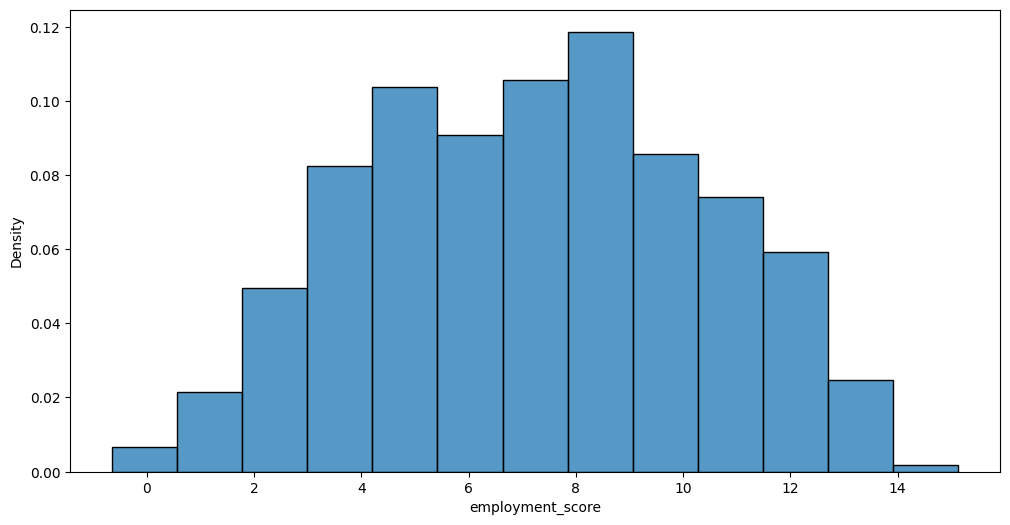

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment_score` >= `0.5`**

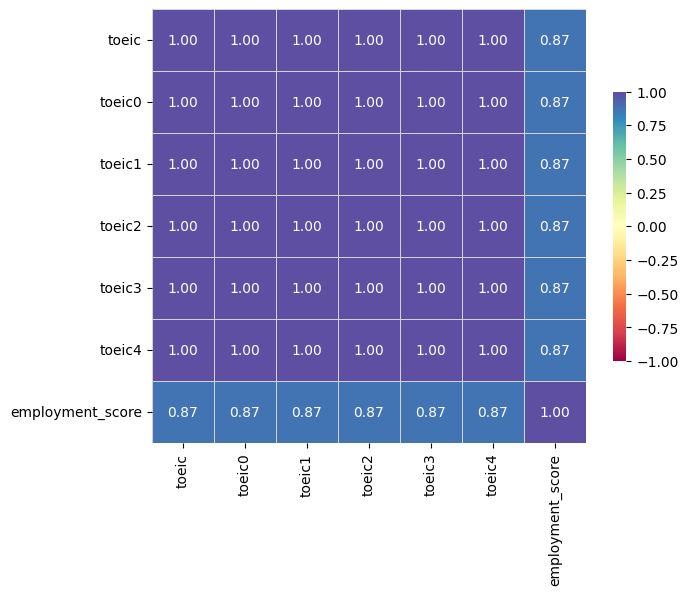

**Feature interaction between `toeic`/`employment_score` in `train_data`**

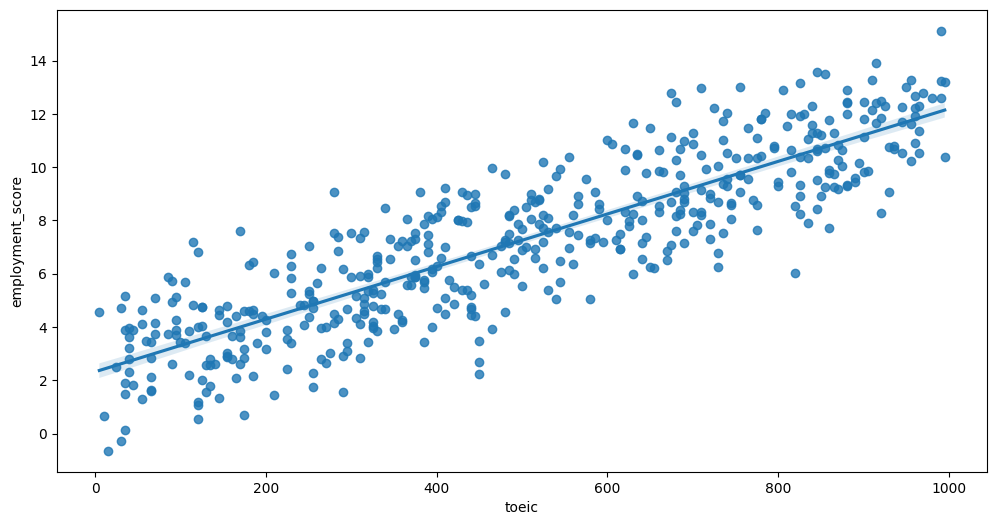

**Feature interaction between `toeic2`/`employment_score` in `train_data`**

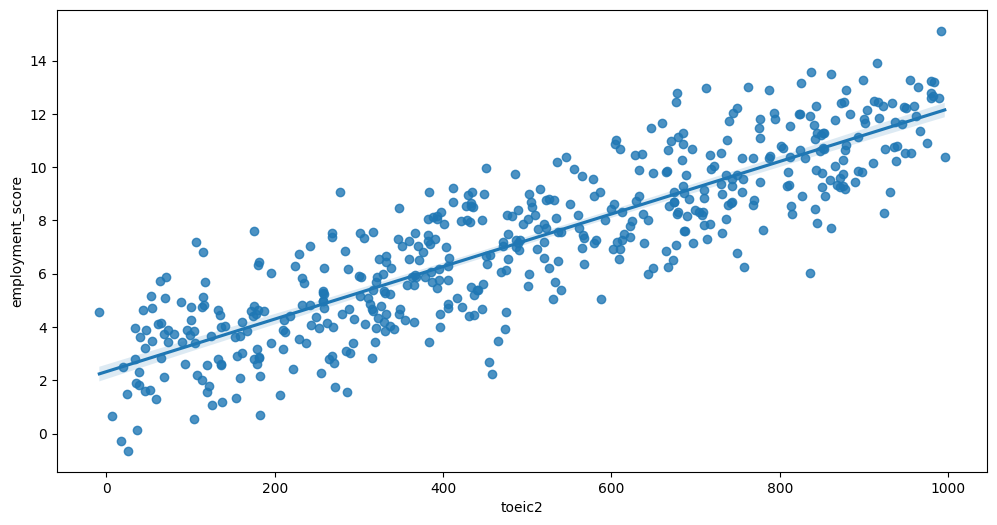

**Feature interaction between `toeic4`/`employment_score` in `train_data`**

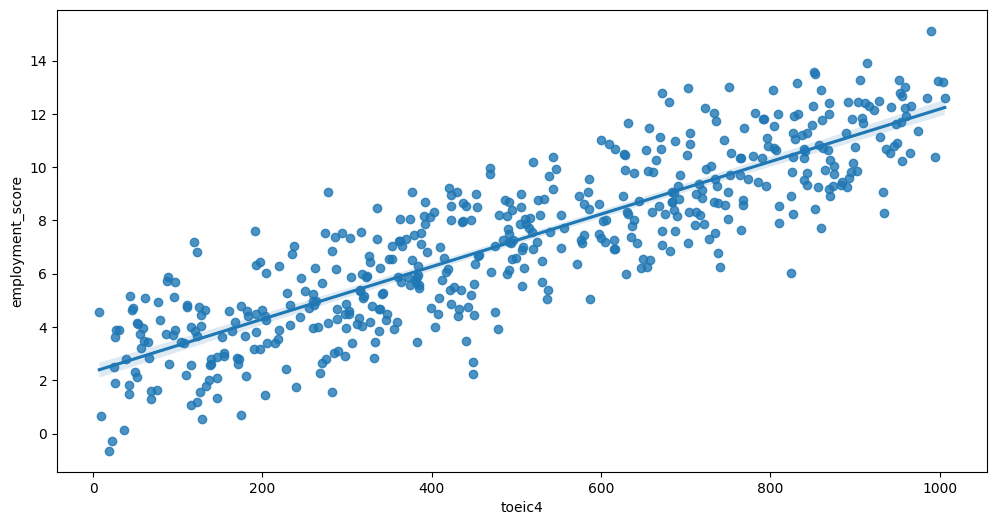

**Feature interaction between `toeic3`/`employment_score` in `train_data`**

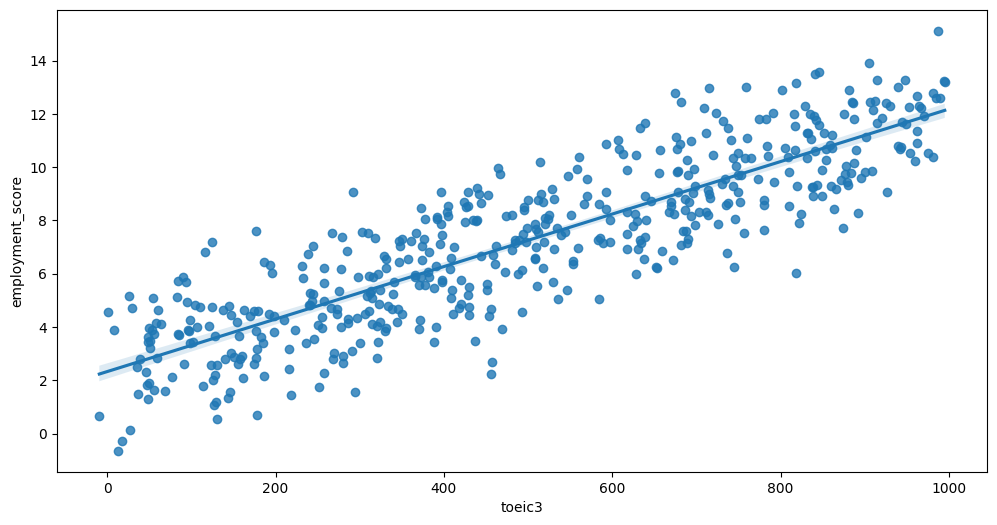

**Feature interaction between `toeic1`/`employment_score` in `train_data`**

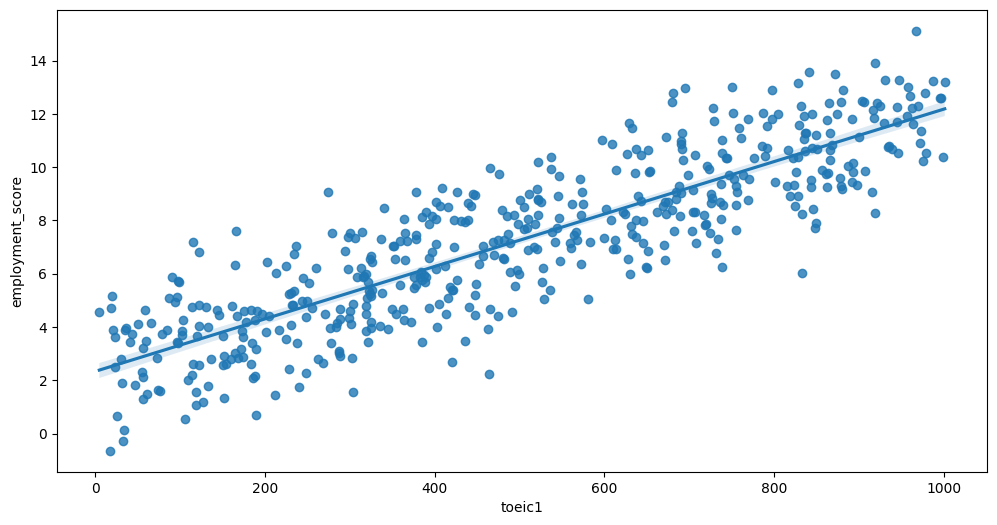

**Feature interaction between `toeic0`/`employment_score` in `train_data`**

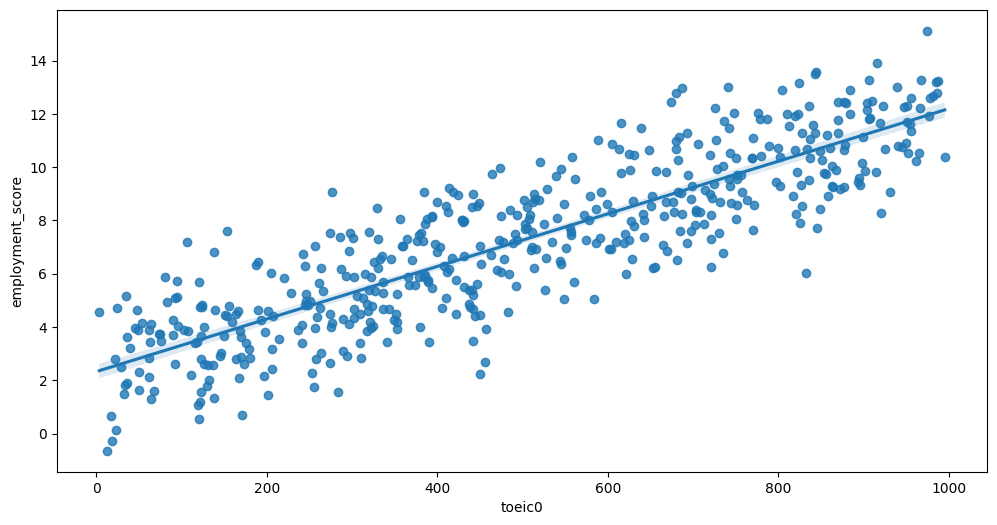

In [20]:
auto.target_analysis(
    train_data=df_train, 
    label='employment_score',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_133142/"


### Model Prediction for employment_score

Using validation data for `Test` points

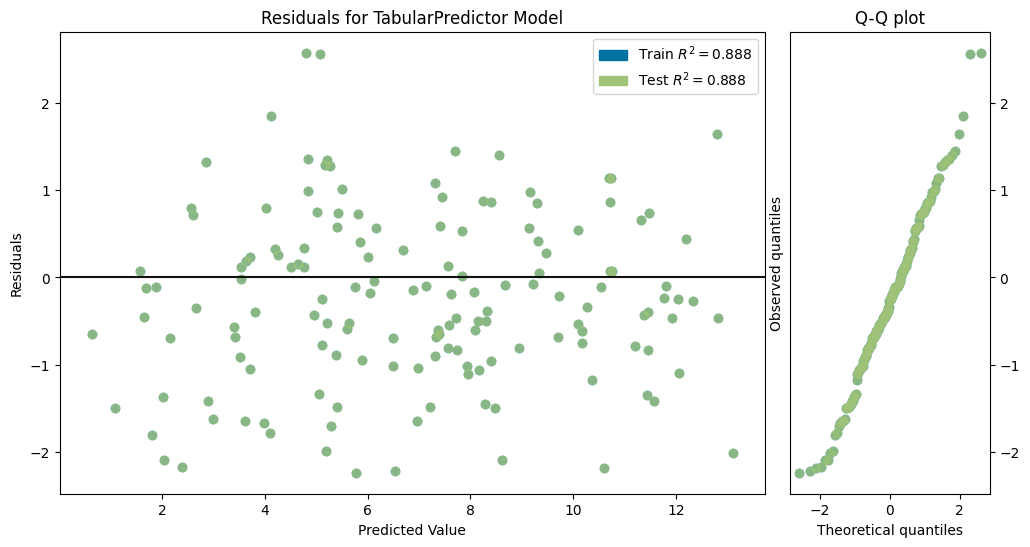

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-1.012202,-0.979194,0.001492,0.001117,0.301716,0.001492,0.001117,0.301716,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
gpa,1.020679,0.095581,0.000009,5,1.217483,0.823876
toeic0,0.266908,0.043618,0.000083,5,0.356718,0.177098
toeic2,0.252605,0.038863,0.000065,5,0.332626,0.172585
toeic,0.241941,0.043093,0.000116,5,0.330669,0.153212
toeic3,0.161979,0.035012,0.000246,5,0.234070,0.089888
toeic1,0.158796,0.040579,0.000470,5,0.242350,0.075242
toeic4,0.136791,0.037064,0.000588,5,0.213106,0.060476


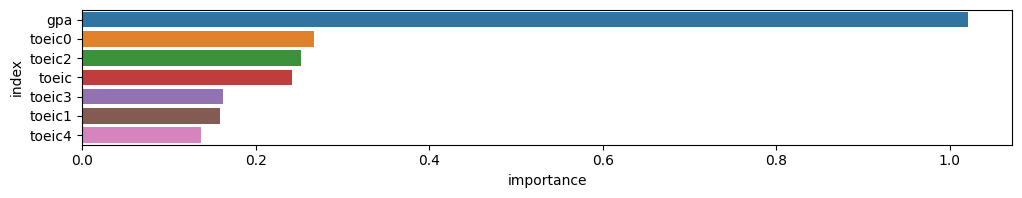

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,employment_score,employment_score_pred,error
55,0.200267,450,450.310311,464.340472,458.213429,456.215452,448.932120,2.234912,4.809618,2.574706
8,4.191552,25,29.000939,22.725391,19.529454,35.896321,24.151228,2.514707,5.069639,2.554931
491,1.754276,425,428.686989,439.377437,446.630603,439.109681,423.056878,8.008441,5.771637,2.236804
144,2.013480,520,519.674312,521.390587,531.847782,511.375625,525.305439,8.755093,6.543661,2.211432
118,3.585276,675,679.425199,680.429579,677.878530,674.812300,672.177564,12.785551,10.599931,2.185620
469,1.969145,5,3.785864,4.575646,-8.358037,1.071854,7.253616,4.552622,2.385054,2.167567
403,1.678080,70,53.993037,65.691879,65.135837,58.510651,51.307683,4.136691,2.040128,2.096563
75,0.564461,795,799.270794,791.212118,803.426181,805.178974,803.979166,10.702375,8.615296,2.087079
293,4.364023,990,973.878219,966.687506,991.332887,987.137768,989.321286,15.120906,13.106976,2.013931
137,4.248511,115,106.422018,114.653052,106.830406,124.361062,118.754414,7.183716,5.199379,1.984337


In [21]:
auto.quick_fit(
    train_data = df_train, 
    label='employment_score',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

In [22]:
predictr.predict(df_train.iloc[[1]])

1    10.530768
Name: employment_score, dtype: float32

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4
1,10.789671,0.355496,935.0,940.563187,935.72357,939.190519,938.995672,945.376482


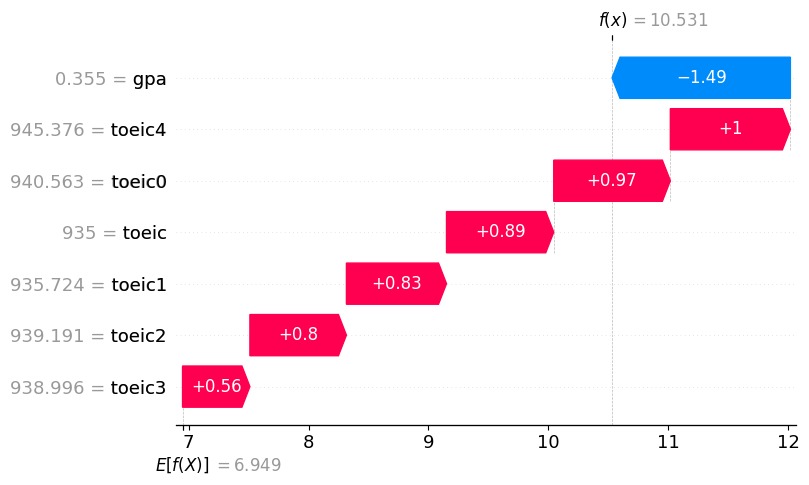

In [23]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]*1
)